# Supply Chain analytics

Revised - Kai He

In [252]:
#importing modules for data visualisation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

## Data reading

In [253]:
#data reading
dataset = pd.read_excel('DataCoSupplyChainDataset.xls')
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [254]:
#checking for null values
dataset.isnull().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Email                       0
Customer Fname                       0
Customer Id                          0
Customer Lname                       0
Customer Password                    0
Customer Segment                     0
Customer State                       0
Customer Street                      0
Customer Zipcode                     0
Department Id                        0
Department Name                      0
Latitude                             0
Longitude                            0
Market                               0
Order City               

In [255]:
#dropping unnecessary columns
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)

In [256]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           16383 non-null  object 
 1   Days for shipping (real)       16383 non-null  int64  
 2   Days for shipment (scheduled)  16383 non-null  int64  
 3   Benefit per order              16383 non-null  float64
 4   Sales per customer             16383 non-null  float64
 5   Delivery Status                16383 non-null  object 
 6   Late_delivery_risk             16383 non-null  int64  
 7   Category Id                    16383 non-null  int64  
 8   Category Name                  16383 non-null  object 
 9   Customer City                  16383 non-null  object 
 10  Customer Country               16383 non-null  object 
 11  Customer Email                 16383 non-null  object 
 12  Customer Fname                 16383 non-null 

## Check multicollinearity between id columns

From the figure we clearly see that: 
1. Category Id is highly correlated with Order Item Cardprod Id, Department Id, Order Item Cardprod Id, Product Card Id,  and Product Category Id
2. Customer Id is highly correlated with Order Customer Id
3. Order Id is highly correlated with Order Item Id

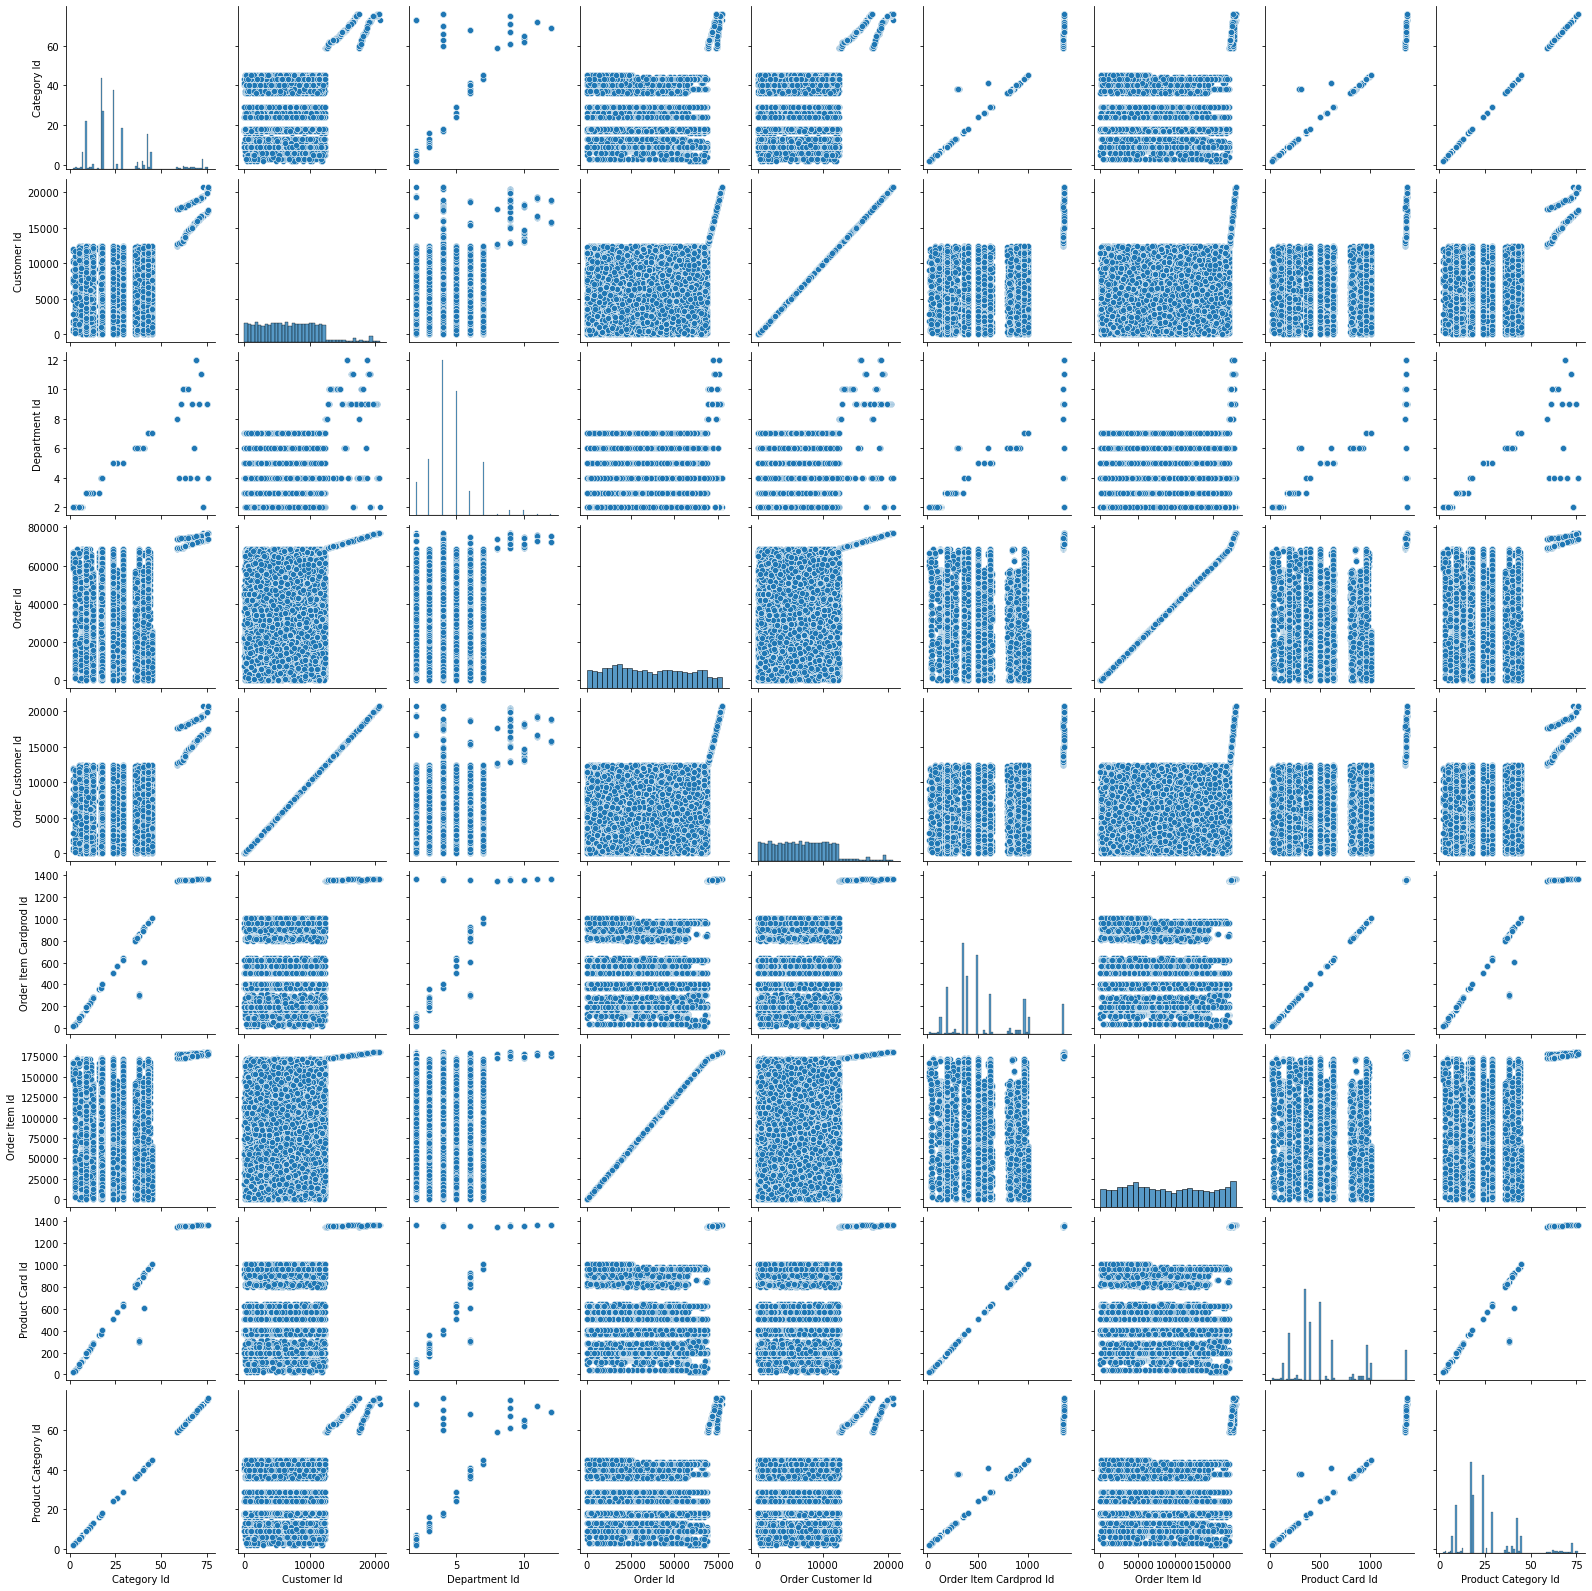

In [257]:
id_col = ['Category Id', 'Customer Id', 'Department Id', 'Order Id', 'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Id', 'Product Card Id', 'Product Category Id']
sns.pairplot(dataset[id_col])

In [258]:
# drop correlated id columns
dataset.drop(columns=['Department Id', 'Order Customer Id', 'Order Item Cardprod Id', 'Product Card Id', 'Product Category Id', 'Order Customer Id', 'Order Item Id'], inplace = True)

In [259]:
# convert categorical columns (from int to object)
cate_col_to_convert = ['Late_delivery_risk', 'Category Id', 'Customer Id', 'Order Id', 'Product Status']
for name in cate_col_to_convert:
    dataset[name] = dataset[name].astype(object)

In [260]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           16383 non-null  object 
 1   Days for shipping (real)       16383 non-null  int64  
 2   Days for shipment (scheduled)  16383 non-null  int64  
 3   Benefit per order              16383 non-null  float64
 4   Sales per customer             16383 non-null  float64
 5   Delivery Status                16383 non-null  object 
 6   Late_delivery_risk             16383 non-null  object 
 7   Category Id                    16383 non-null  object 
 8   Category Name                  16383 non-null  object 
 9   Customer City                  16383 non-null  object 
 10  Customer Country               16383 non-null  object 
 11  Customer Email                 16383 non-null  object 
 12  Customer Fname                 16383 non-null 

In [261]:
#checking for unique values 
categorical_variables = [ c for c in dataset.columns if dataset[c].dtype =='O']
for names in categorical_variables:
    print(names)
    print(dataset[names].nunique())

Type
4
Delivery Status
4
Late_delivery_risk
2
Category Id
42
Category Name
41
Customer City
555
Customer Country
2
Customer Email
1
Customer Fname
629
Customer Id
7227
Customer Lname
1031
Customer Password
1
Customer Segment
3
Customer State
44
Customer Street
4814
Department Name
11
Market
5
Order City
2422
Order Country
143
order date (DateOrders)
10456
Order Id
10456
Order Region
23
Order State
854
Order Status
9
Product Image
90
Product Name
90
Product Status
1
shipping date (DateOrders)
10421
Shipping Mode
4


## Check multicollinearity between float columns

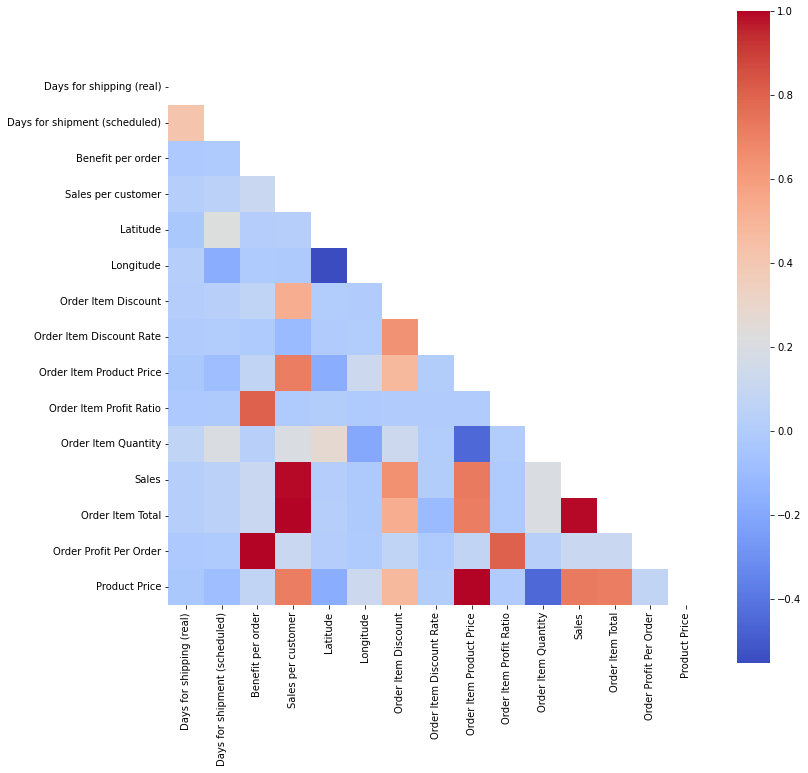

In [262]:
#checking correlation between numeric variables
numerical_variables = [ c for c in dataset.columns if dataset[c].dtypes != 'O']
fig, ax = plt.subplots(figsize = (12,12))
matrix = np.triu(dataset[numerical_variables].corr())

#constructing a heatmap
ax  = sns.heatmap(dataset[numerical_variables].corr(), cmap= 'coolwarm',square=True , mask=matrix)
plt.show()

## Regression Models

In [263]:
#Importing Modules for Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import utils
import statsmodels.api as sm

### Regression to Predict Late Delivery Risk (whether an order will be late)

use "classifier" if you need the logistic regression model.

In [264]:
df_late_pred = dataset

feature_list = ['Days for shipment (scheduled)', 'Sales', 'Benefit per order', 'Category Id', 'Order Region', 'Order Item Discount Rate', 'Product Price', 'Order Item Quantity', 'Shipping Mode', 'Customer Segment']
X = pd.get_dummies(df_late_pred[feature_list], drop_first=True)
Y = df_late_pred['Late_delivery_risk']==1

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

In [266]:
#Logistic Regression model
sc = StandardScaler()
X_train_sd =sc.fit_transform(X_train)
X_val_sd =sc.transform(X_val)
X_test_sd =sc.transform(X_test)

# L1 penalty means lasso; C means alpha: should try multiple values later (do CV)
classifier = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
classifier.fit(X_train_sd, Y_train)
Y_pred  = classifier.predict(X_val_sd)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_val, Y_pred)
cr = classification_report(Y_val, Y_pred)
print(cm)
print(cr)

[[1309  220]
 [ 826  922]]
              precision    recall  f1-score   support

       False       0.61      0.86      0.71      1529
        True       0.81      0.53      0.64      1748

    accuracy                           0.68      3277
   macro avg       0.71      0.69      0.68      3277
weighted avg       0.72      0.68      0.67      3277



In [267]:
#K-means Nearest Neighbours Model
classifier = KNeighborsClassifier(n_neighbors = 200, metric = 'minkowski', p = 2)
classifier.fit(X_train_sd, Y_train)
Y_pred = classifier.predict(X_val_sd)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_val, Y_pred)
cr = classification_report(Y_val, Y_pred)
print(cm)
print(cr)

[[1195  334]
 [ 753  995]]
              precision    recall  f1-score   support

       False       0.61      0.78      0.69      1529
        True       0.75      0.57      0.65      1748

    accuracy                           0.67      3277
   macro avg       0.68      0.68      0.67      3277
weighted avg       0.69      0.67      0.67      3277



In [268]:
#Decision Tree Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_sd, Y_train)
Y_pred = classifier.predict(X_val_sd)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_val, Y_pred)
cr = classification_report(Y_val, Y_pred)
print(cm)
print(cr)

[[ 909  620]
 [ 628 1120]]
              precision    recall  f1-score   support

       False       0.59      0.59      0.59      1529
        True       0.64      0.64      0.64      1748

    accuracy                           0.62      3277
   macro avg       0.62      0.62      0.62      3277
weighted avg       0.62      0.62      0.62      3277



In [269]:
#Random Forest Classifier Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_sd, Y_train)
Y_pred = classifier.predict(X_val_sd)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_val, Y_pred)
cr = classification_report(Y_val, Y_pred)
print(cm)
print(cr)

[[1009  520]
 [ 652 1096]]
              precision    recall  f1-score   support

       False       0.61      0.66      0.63      1529
        True       0.68      0.63      0.65      1748

    accuracy                           0.64      3277
   macro avg       0.64      0.64      0.64      3277
weighted avg       0.65      0.64      0.64      3277



Looks like log regression model performs the best and has the best interpretability

Retrain the log regression model with training+validation data

In [270]:
#Logistic Regression model
X_train_sd_2 =sc.fit_transform(pd.concat([X_train, X_val]))
Y_train_2 = pd.concat([Y_train, Y_val])
X_test_sd_2 =sc.transform(X_test)

In [271]:
# L1 penalty means lasso; C means alpha
classifier = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=0)
classifier.fit(X_train_sd_2, Y_train_2)
Y_pred  = classifier.predict(X_test_sd_2)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1332  202]
 [ 817  926]]
              precision    recall  f1-score   support

       False       0.62      0.87      0.72      1534
        True       0.82      0.53      0.65      1743

    accuracy                           0.69      3277
   macro avg       0.72      0.70      0.68      3277
weighted avg       0.73      0.69      0.68      3277



In [272]:
log_coef = pd.Series(classifier.coef_.flatten(), index=list(X.columns))

<AxesSubplot:>

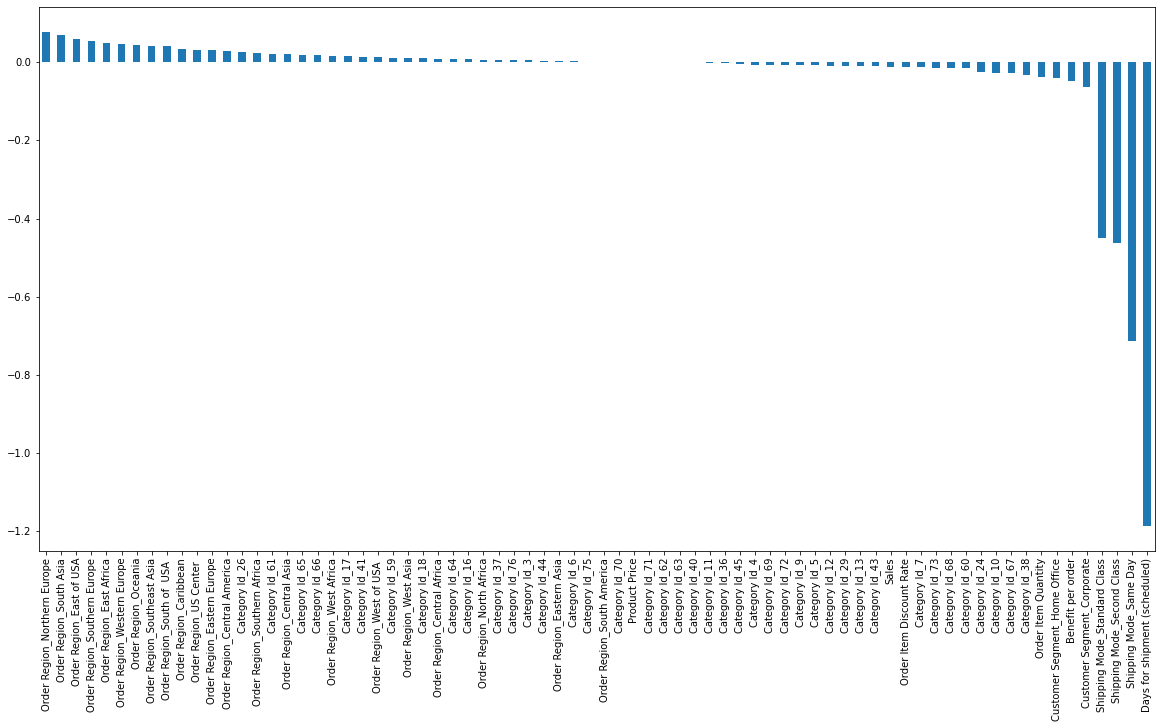

In [273]:
log_coef.sort_values(ascending=False).plot.bar(figsize=(20, 10))

We will zoom in to the top 5 positive factors (factors with the most delay risk) and top 5 negative factors (factors with the least delay risk) to gather insights for improvement

In [274]:
#factors with the most delay risk
log_coef.sort_values(ascending=False)[:5]

Order Region_Northern Europe    0.077215
Order Region_South Asia         0.070330
Order Region_East of USA        0.057876
Order Region_Southern Europe    0.055148
Order Region_East Africa        0.049196
dtype: float64

Text(0, 0.5, 'coefficient')

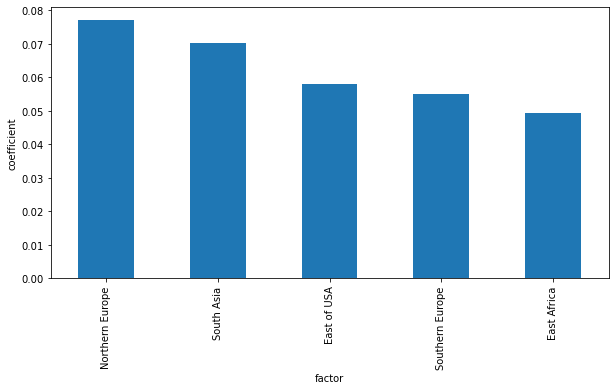

In [275]:
regions_high_late_risk = log_coef.sort_values(ascending=False)[:5]
regions_high_late_risk.index = [region.replace('Order Region_', '') for region in regions_high_late_risk.index]
positive_bar = regions_high_late_risk.plot.bar(figsize=(10, 5))
positive_bar.set_xlabel("factor")
positive_bar.set_ylabel("coefficient")

In [276]:
#factors with the least delay risk
log_coef.sort_values(ascending=True)[:5]

Days for shipment (scheduled)   -1.186358
Shipping Mode_Same Day          -0.712835
Shipping Mode_Second Class      -0.462583
Shipping Mode_Standard Class    -0.448767
Customer Segment_Corporate      -0.062514
dtype: float64

Text(0, 0.5, 'coefficient')

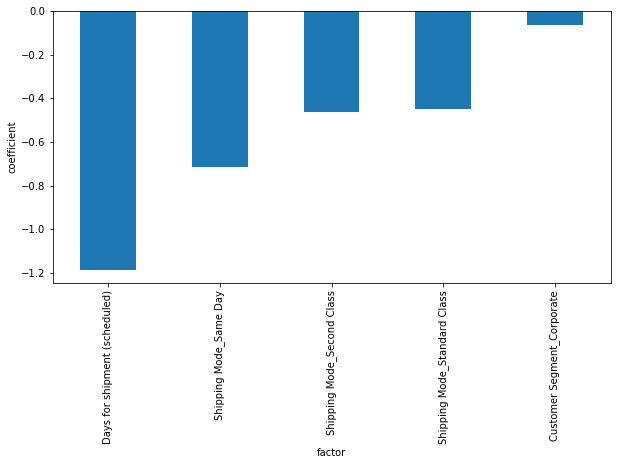

In [277]:
negative_bar = log_coef.sort_values(ascending=True)[:5].plot.bar(figsize=(10, 5))
negative_bar.set_xlabel("factor")
negative_bar.set_ylabel("coefficient")

## Insights

1. Extend the scheduled days of shippment `t` can lower the probability of delay
2. First class shipping mode has more delays (because coefficients of other shipping modes are all negative)

In [278]:
dataset["Shipping Mode"].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

## Identify Which Region Worth Improving

From the fitted logistic regression model, we know that the top 5 factors with the most delay risk are all regions factors.

To identify which region's operation of delivery timeliness needs to be improved, we will focus on the regions which generate the most revenue (top 5 regions in sales) and check if they also have high delay risk.

#### logistic regression coefficients

**Top 5 positive coefficients:**

Order Region_Northern Europe    0.079221

Order Region_South Asia         0.071962

Order Region_East of USA        0.058780

Order Region_Southern Europe    0.055865

Order Region_East Africa        0.049461

In [279]:
#Grouping by order region
df1 = dataset.groupby(['Order Region']).sum()

#sorting by sales
df1 = df1.sort_values('Sales', ascending =False)

In [280]:
#Finding the top 5 regions in sales 
top5_sales_region = df1['Sales'][:5]
top5_sales_region

Order Region
Western Europe     642688.051093
Central America    470041.668029
South America      259620.054193
Southern Europe    227992.194141
Northern Europe    227658.864084
Name: Sales, dtype: float64

Visualization: plot region sales with bar chart (descending), plot corresponding region coefficient with line chart, the regions with both high sales and high coefficient (delay risk) should be improved

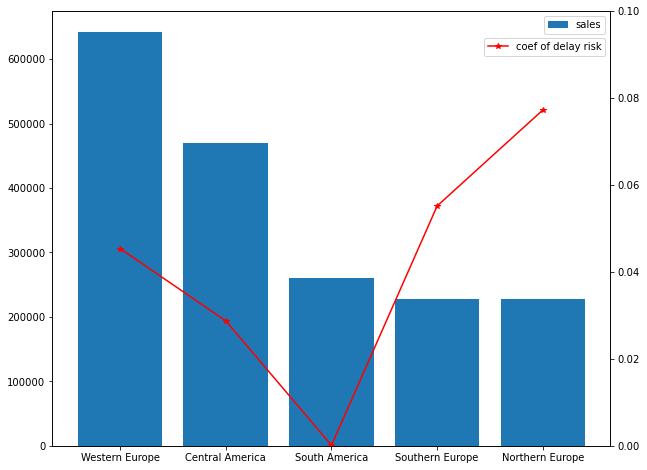

In [281]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x=top5_sales_region.index, height=top5_sales_region, label='sales')

ax2 = ax.twinx()
region_list = ['Order Region_' + region for region in list(top5_sales_region.index)]
region_delay = log_coef[region_list]
region_delay.index = [region.replace('Order Region_', '') for region in region_delay.index]
ax2.plot(region_delay, color='red', marker='*', label='coef of delay risk')
ax.legend(loc='upper right', bbox_to_anchor=(1,1))
ax2.legend(loc='upper right', bbox_to_anchor=(1,0.95))
ax2.set_ylim(0,0.1)
plt.show()

The company should take measures to improve on-time delivery performance for orders in `Northern Europe` (has highest delay risk, also has large sales - among the top 5) and `Western Europe` (with most sales and moderate-high delay risk).

### Add "recent delay"

Recent delays have basically no effect on future delay risk - order delay of this company has no "momentum effect".

Because:
1. It doesn't improve the prediction accuracy
2. The coefficient of "recent delay" is very close to 0 (-0.00083), meaning it doesn't affect the probability of future delay.

In terms of "will recent late delivery a sign of future late", we need to compare apple to apple (for example, recent delays in Asia may have little effect on future delays in north America)

Can't define "recent late" when the size is too small in each group - how do we decide which dimensions to group by? Select from the most significant features in the previous part.

In [282]:
df_recent_delay = dataset
categorical_features = [ c for c in df_recent_delay[feature_list].columns if df_recent_delay[c].dtype =='O']
df_recent_delay.groupby(categorical_features).size()

Category Id  Order Region     Shipping Mode   Customer Segment
2            Caribbean        Second Class    Home Office         1
             Central America  Second Class    Home Office         1
                              Standard Class  Consumer            4
                                              Home Office         1
             Northern Europe  Second Class    Consumer            1
                                                                 ..
76           Southeast Asia   First Class     Consumer            1
                                              Home Office         2
                              Second Class    Consumer            5
                              Standard Class  Corporate           6
                                              Home Office         2
Length: 2570, dtype: int64

We can only group orders by one dimension to maintain a enough scale for calculating "recent delay proportion".

In [283]:
# region is the most significant factor in log regression model
groupby_features = ['Order Region']
df_recent_delay.groupby(groupby_features).size()

Order Region
Canada               78
Caribbean           652
Central Africa      158
Central America    2265
Central Asia         62
East Africa         167
East of USA         541
Eastern Asia        717
Eastern Europe      411
North Africa        259
Northern Europe     990
Oceania            1006
South America      1267
South Asia          762
South of  USA       340
Southeast Asia      915
Southern Africa      95
Southern Europe    1010
US Center           459
West Africa         312
West Asia           497
West of USA         605
Western Europe     2815
dtype: int64

In [284]:
# this looks like a group size large enough
# can't add even one more to maintain a reasonable size
min(df_recent_delay.groupby(groupby_features).size())

62

In [285]:
df_recent_delay['shipping date'] = pd.to_datetime(df_recent_delay['shipping date (DateOrders)'], utc=True).dt.date.astype('datetime64')
df_recent_delay = df_recent_delay.sort_values(by=['Order Region','shipping date'])

In [286]:
df_recent_delay['delivery date'] = df_recent_delay['shipping date'] + pd.to_timedelta(df_recent_delay['Days for shipping (real)'], unit='d')

In [287]:
df_recent_delay[['Order Region','shipping date', 'delivery date']].head()

,Order Region,shipping date,delivery date
8551,Canada,2016-01-09,2016-01-11
13648,Canada,2016-01-09,2016-01-11
1938,Canada,2016-02-09,2016-02-12
195,Canada,2016-03-09,2016-03-13
15074,Canada,2016-03-09,2016-03-13


In [288]:
# "recent delay" column of a specific order: average late delivery risk for orders in the same region and within one week before the shipping date of this order
df_recent_delay['recent delay'] = None
for index, row in df_recent_delay.iterrows():
    recent_orders = df_recent_delay[ (df_recent_delay['delivery date']<row['shipping date']) & (df_recent_delay['delivery date']>=row['shipping date']-pd.to_timedelta(7, unit='d')) & (df_recent_delay['Order Region']==row['Order Region']) ]
    if pd.isna(recent_orders['Late_delivery_risk'].mean()):
        df_recent_delay.iloc[index, 46] = df_recent_delay['Late_delivery_risk'].mean() # about 3000 orders fall into this
    else:
        df_recent_delay.iloc[index, 46] = recent_orders['Late_delivery_risk'].mean() # 46 is the index for "recent delay", just to avoid SettingWithCopyWarning
    
df_recent_delay['recent delay'] = df_recent_delay['recent delay'].astype('float')

In [289]:
df_recent_delay['recent delay'].head()

8551     0.525972
13648    0.650000
1938     0.583333
195      0.400000
15074    0.500000
Name: recent delay, dtype: float64

In [290]:
df_recent_delay['recent delay'].isnull().sum()

0

In [291]:
feature_list = ['Days for shipment (scheduled)', 'Benefit per order', 'Category Id', 'Order Region', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Shipping Mode', 'Customer Segment', 'recent delay']
X_recent1 = pd.get_dummies(df_recent_delay[feature_list], drop_first=True)
Y_recent1 = df_recent_delay['Late_delivery_risk']==1

In [292]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_recent1,Y_recent1,test_size =0.2, random_state = 0)

In [293]:
#Logistic Regression model, with recent delay
X_train_sd_3 =sc.fit_transform(X_train_3)
X_test_sd_3 =sc.transform(X_test_3)

# L1 penalty means lasso; C means alpha: should try multiple values later (do CV)
classifier_rec_de = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=0)
classifier_rec_de.fit(X_train_sd_3, Y_train_3)
Y_pred_3  = classifier_rec_de.predict(X_test_sd_3)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test_3, Y_pred_3)
cr = classification_report(Y_test_3, Y_pred_3)
print(cm)
print(cr)

[[1358  191]
 [ 815  913]]
              precision    recall  f1-score   support

       False       0.62      0.88      0.73      1549
        True       0.83      0.53      0.64      1728

    accuracy                           0.69      3277
   macro avg       0.73      0.70      0.69      3277
weighted avg       0.73      0.69      0.68      3277



In [294]:
log_coef_3 = pd.Series(classifier_rec_de.coef_.flatten(), index=list(X_recent1.columns))
log_coef_3['recent delay']

-0.0008339509596897154

In [295]:
# what if we drop nan recent delay rows?
# "recent delay" column of a specific order: average late delivery risk for orders in the same region and within one week before the shipping date of this order
df_recent_delay['recent delay'] = None
for index, row in df_recent_delay.iterrows():
    recent_orders = df_recent_delay[ (df_recent_delay['delivery date']<row['shipping date']) & (df_recent_delay['delivery date']>=row['shipping date']-pd.to_timedelta(7, unit='d')) & (df_recent_delay['Order Region']==row['Order Region']) ]
    df_recent_delay.iloc[index, 46] = recent_orders['Late_delivery_risk'].mean() # 46 is the index for "recent delay", just to avoid SettingWithCopyWarning
    
df_recent_delay['recent delay'] = df_recent_delay['recent delay'].astype('float')
df_recent_delay = df_recent_delay.dropna()

In [296]:
df_recent_delay['recent delay'].head()

13648    0.650000
1938     0.583333
195      0.400000
15074    0.500000
2437     0.400000
Name: recent delay, dtype: float64

In [297]:
feature_list = ['Days for shipment (scheduled)', 'Benefit per order', 'Category Id', 'Order Region', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Shipping Mode', 'Customer Segment', 'recent delay']
X_recent2 = pd.get_dummies(df_recent_delay[feature_list], drop_first=True)
Y_recent2 = df_recent_delay['Late_delivery_risk']==1

In [298]:
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_recent2,Y_recent2,test_size =0.2, random_state = 0)

In [299]:
#Logistic Regression model, with recent delay
sc = StandardScaler()
X_train_sd_4 =sc.fit_transform(X_train_4)
X_test_sd_4 =sc.transform(X_test_4)

# L1 penalty means lasso; C means alpha: should try multiple values later (do CV)
classifier_rec_de_2 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=0)
classifier_rec_de_2.fit(X_train_sd_4, Y_train_4)
Y_pred_4 = classifier.predict(X_test_sd_4)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test_4, Y_pred_4)
cr = classification_report(Y_test_4, Y_pred_4)
print(cm)
print(cr)

[[1099  147]
 [ 640  698]]
              precision    recall  f1-score   support

       False       0.63      0.88      0.74      1246
        True       0.83      0.52      0.64      1338

    accuracy                           0.70      2584
   macro avg       0.73      0.70      0.69      2584
weighted avg       0.73      0.70      0.69      2584



In [300]:
log_coef_4 = pd.Series(classifier.coef_.flatten(), index=list(X_recent2.columns))
log_coef_4['recent delay']

-0.03716977796270522

## Optimization

### Optimize the Decision Threshold

Suppose each late delivery has a loss (l). Suppose we can take some actions with a cost (c) to reduce the probability of late delivery.

We can make some assumptions on the values of l and c:
- l: The value can depend on customer retention
    - according to https://clutch.co/logistics/resources/how-two-day-delivery-impacts-small-businesses, 45% of the customers say they are unlikely to continue ordering from a company if it delivers a package late
    - l = 0.45 * profit per order
- c: The value can depend on the specific actions we take.
    - Maybe expend the scheduled delivery time. This will reduce the competitiveness compared to competitors.

Now we wonder when we should take the actions to prevent an order from being late. 
1. predict late probability (p) of orders
2. set a threshold (r)
    - if $p \ge r$ => orders predicted late => take actions
    - if $p<r$ => orders predicted on time => do nothing

expected costs:
- tp = c + (1-s)*l: late actually, late predicted; s is the action's success rate (the probability that the action successfully prevents delay)
- tn = 0: on time actually, on time predicted
- fp = c: on time actually, late predicted
- fn = l: late actually, on time predicted


Divide the orders into 2 segments (because for order with higher profit, we want to be more vigilant):
- High-profit segment: profit per order among the top 20%, use lower threshold
- Low-profit segment: profit per order among the last 80%, use higher threshold

#### Set Parameters
- c: the cost of actions
- s: the effectiveness of the actions

In [398]:
c = input('Enter cost of actions to prevent delay: ')
c = int(c)
c, type(c)

Enter cost of actions to prevent delay: 20


(20, int)

In [399]:
s = input('Enter success rate of preventive actions: ')
s = float(s)
s, type(s)

Enter success rate of preventive actions: 0.9


(0.9, float)

In [400]:
classifier.classes_

array([False,  True])

#### Split Train and Test
- optimize threshold with train set
- evaluate with test set

In [401]:
r_range = np.arange(0,1.02,0.02)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)
X_train_sd = sc.fit_transform(X_train)

n = X_train.shape[0]
m = X_test.shape[0]
high_profit_ratio = 0.2

train = pd.concat([X_train, Y_train], axis=1)
train.sort_values(by='Benefit per order', ascending=False, inplace=True)
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1]

#training set
X_train_high_profit = X_train.head(int(high_profit_ratio*n))
Y_train_high_profit = Y_train.head(int(high_profit_ratio*n))
X_train_low_profit = X_train.tail(int((1-high_profit_ratio)*n))
Y_train_low_profit = Y_train.tail(int((1-high_profit_ratio)*n))

test = pd.concat([X_test, Y_test], axis=1)
test.sort_values(by='Benefit per order', ascending=False, inplace=True)
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]

#test set
X_test_high_profit = X_test.head(int(high_profit_ratio*m))
Y_test_high_profit = Y_test.head(int(high_profit_ratio*m))
X_test_low_profit = X_test.tail(int((1-high_profit_ratio)*m))
Y_test_low_profit = Y_test.tail(int((1-high_profit_ratio)*m))

In [402]:
X_train_high_profit.head()

,Days for shipment (scheduled),Sales,Benefit per order,Order Item Discount Rate,Product Price,Order Item Quantity,Category Id_3,Category Id_4,Category Id_5,Category Id_6,...,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Customer Segment_Corporate,Customer Segment_Home Office
12528,4,1500.00000,684.000000,0.05,1500.00000,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
13333,4,1500.00000,669.299988,0.03,1500.00000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13343,4,1999.98999,660.000000,0.12,1999.98999,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9601,1,1500.00000,614.250000,0.09,1500.00000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,4,1500.00000,599.250000,0.15,1500.00000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [403]:
X_train_low_profit.head()

,Days for shipment (scheduled),Sales,Benefit per order,Order Item Discount Rate,Product Price,Order Item Quantity,Category Id_3,Category Id_4,Category Id_5,Category Id_6,...,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Customer Segment_Corporate,Customer Segment_Home Office
13073,4,299.980011,77.209999,0.01,299.980011,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3692,1,299.980011,77.209999,0.01,299.980011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8053,4,299.980011,77.209999,0.01,299.980011,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
15820,1,299.950012,77.209999,0.01,59.990002,5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4485,4,299.950012,77.209999,0.01,59.990002,5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [404]:
Y_train_high_profit.head()

12528     True
13333     True
13343     True
9601      True
1370     False
Name: Late_delivery_risk, dtype: bool

#### Optimize and Evaluate on the Whole Train Set

In [405]:
l_train = 0.45 * X_train['Benefit per order'].clip(lower=0) #for orders with negative profit, set l=0
X_train_sd = sc.fit_transform(X_train)
prob_delay = classifier.predict_proba(X_train_sd)[:,1]
prob_delay

array([0.33986757, 0.36717604, 0.16733104, ..., 0.62728688, 0.67468081,
       0.72899191])

In [406]:
# action_cost = [0 for r in r_range]

# def calculate_action_cost(c, s, r, X_train, Y_train):
#     l_train = 0.45 * X_train['Benefit per order'].clip(lower=0) #for orders with negative profit, set l=0
#     X_train_sd = sc.fit_transform(X_train)
#     prob_delay = classifier.predict_proba(X_train_sd)[:,1]
    
#     for i in range(len(r_range)):
#     r = r_range[i]
#     Y_pred = np.where(prob_delay > r, 1, 0)

#     true_pos = np.where((Y_pred == 1) & (Y_train), 1, 0)
#     true_pos_cost = true_pos*c + (1-s) * l_train.values * true_pos

#     false_pos = np.where((Y_pred == 1) & (Y_train == False), 1, 0)
#     false_pos_cost = false_pos*c

#     false_neg = np.where((Y_pred == 0) & (Y_train), 1, 0)
#     false_neg_cost = l_train.values * false_neg

#     action_cost[i] = true_pos_cost.sum() + false_pos_cost.sum() + false_neg_cost.sum()
    
#     return current_cost, action_cost

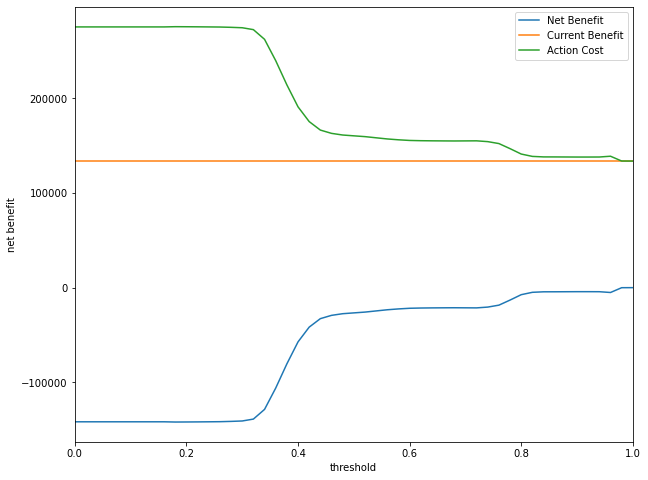

In [407]:
def calculate_costs(c, s, prob_delay, Y_train, l_train):
    action_cost = [0 for r in r_range]
    current_cost = (np.where(Y_train, 1, 0) * l_train).sum()
    
    for i in range(len(r_range)):
        r = r_range[i]
        Y_pred = np.where(prob_delay > r, 1, 0)

        true_pos = np.where((Y_pred == 1) & (Y_train), 1, 0)
        true_pos_cost = true_pos*c + (1-s) * l_train.values * true_pos

        false_pos = np.where((Y_pred == 1) & (Y_train == False), 1, 0)
        false_pos_cost = false_pos*c

        false_neg = np.where((Y_pred == 0) & (Y_train), 1, 0)
        false_neg_cost = l_train.values * false_neg

        action_cost[i] = true_pos_cost.sum() + false_pos_cost.sum() + false_neg_cost.sum()
    
    return current_cost, action_cost

current_cost, action_cost = calculate_costs(c, s, prob_delay, Y_train, l_train)
benefit = current_cost - action_cost

plt.figure(figsize=(10, 8))
# plt.ylim((0, 20000)) 
plt.xlim((0, 1))
plt.ylabel('net benefit')
plt.xlabel('threshold')
plt.plot(r_range, benefit, label='Net Benefit')
plt.plot(r_range, np.repeat(current_cost, len(r_range)), label='Current Benefit')
plt.plot(r_range, action_cost, label='Action Cost')
plt.legend()

#### Optimize and Evaluate on 2 Profit Segments

In [408]:
l_train_high_profit = 0.45 * X_train_high_profit['Benefit per order']
l_train_low_profit = 0.45 * X_train_low_profit['Benefit per order'].clip(lower=0) #for orders with negative profit, set l=0
l_train_high_profit.head()

12528    307.800000
13333    301.184995
13343    297.000000
9601     276.412500
1370     269.662500
Name: Benefit per order, dtype: float64

In [409]:
X_train_high_profit_sd = sc.transform(X_train_high_profit)
X_train_low_profit_sd = sc.transform(X_train_low_profit)

prob_delay_high_profit = classifier.predict_proba(X_train_high_profit_sd)[:,1]
prob_delay_low_profit = classifier.predict_proba(X_train_low_profit_sd)[:,1]

optimal threshold for high profit orders: 0.42


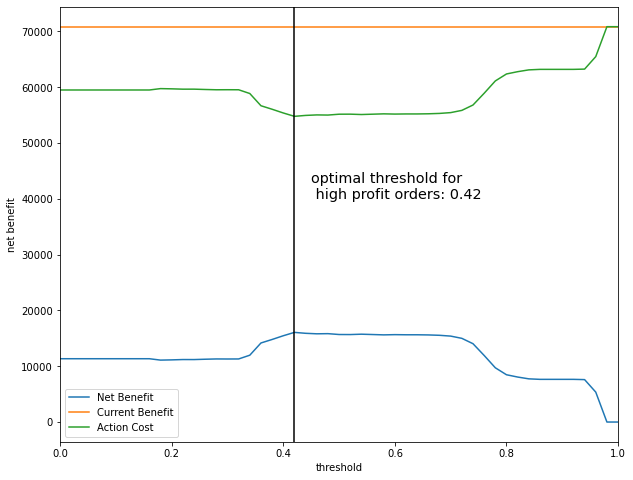

In [410]:
# high profit segment, train for optimal threshold
current_cost_high_profit, action_cost_high_profit = calculate_costs(c, s, prob_delay_high_profit, Y_train_high_profit, l_train_high_profit)
benefit_high_profit = current_cost_high_profit - action_cost_high_profit

optimal_r_high_profit = r_range[np.argmax(benefit_high_profit)]
print("optimal threshold for high profit orders:", optimal_r_high_profit)

plt.figure(figsize=(10, 8))
# plt.ylim((0, 20000))
plt.xlim((0, 1))
plt.ylabel('net benefit')
plt.xlabel('threshold')
plt.plot(r_range, benefit_high_profit, label='Net Benefit')
plt.plot(r_range, np.repeat(current_cost_high_profit, len(r_range)), label='Current Benefit')
plt.plot(r_range, action_cost_high_profit, label='Action Cost')
plt.legend()
plt.axvline(optimal_r_high_profit, color='black')
plt.text(0.45, 40000, 'optimal threshold for \n high profit orders: {}'.format(optimal_r_high_profit), fontsize='x-large')
plt.show()

optimal threshold for low profit orders: 1.0


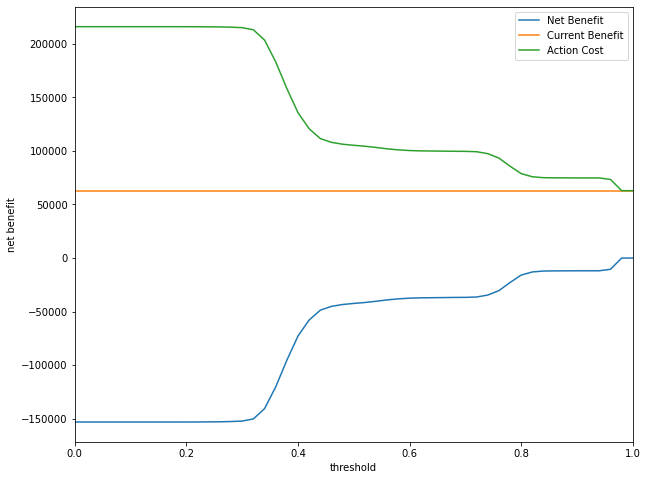

In [411]:
# low profit segment
current_cost_low_profit, action_cost_low_profit = calculate_costs(c, s, prob_delay_low_profit, Y_train_low_profit, l_train_low_profit)
benefit_low_profit = current_cost_low_profit - action_cost_low_profit

optimal_r_low_profit = r_range[np.argmax(benefit_low_profit)]
print("optimal threshold for low profit orders:", optimal_r_low_profit)

plt.figure(figsize=(10, 8))
# plt.ylim((0, 20000))
plt.xlim((0, 1))
plt.ylabel('net benefit')
plt.xlabel('threshold')
plt.plot(r_range, benefit_low_profit, label='Net Benefit')
plt.plot(r_range, np.repeat(current_cost_low_profit, len(r_range)), label='Current Benefit')
plt.plot(r_range, action_cost_low_profit, label='Action Cost')
plt.legend()
plt.show()

We do not perform preventive actions on low profit orders: threshold = 1.0

In [412]:
# evaluate benefit on test set
l_test_high_profit = 0.45 * X_test_high_profit['Benefit per order']
l_test_low_profit = 0.45 * X_test_low_profit['Benefit per order']

X_test_high_profit_sd = sc.transform(X_test_high_profit)
X_test_low_profit_sd = sc.transform(X_test_low_profit)

prob_delay_test_high_profit = classifier.predict_proba(X_test_high_profit_sd)[:,1]
prob_delay_test_low_profit = classifier.predict_proba(X_test_low_profit_sd)[:,1]

def calculate_costs_test(optimal_r, prob_delay_test, Y_test, l_test):
    current_cost = (np.where(Y_test, 1, 0) * l_test).sum()    
    action_cost = 0
    
    Y_pred = np.where(prob_delay_test > optimal_r, 1, 0)

    true_pos = np.where((Y_pred == 1) & (Y_test), 1, 0)
    true_pos_cost = true_pos*c + (1-s) * l_test.values * true_pos

    false_pos = np.where((Y_pred == 1) & (Y_test == False), 1, 0)
    false_pos_cost = false_pos*c

    false_neg = np.where((Y_pred == 0) & (Y_test), 1, 0)
    false_neg_cost = l_test.values * false_neg
    
    action_cost = true_pos_cost.sum() + false_pos_cost.sum() + false_neg_cost.sum()

    return current_cost, action_cost

# high profit segment
current_cost_test_high_profit, action_costaction_test_high_profit = calculate_costs_test(optimal_r_high_profit, prob_delay_test_high_profit, Y_test_high_profit, l_test_high_profit)
benefit_test_high_profit = current_cost_test_high_profit - action_cost_test_high_profit

In [413]:
potential_val = (np.where(Y_test_high_profit, 1, 0) * (-c) + s * l_test_high_profit.values * np.where(Y_test_high_profit, 1, 0) ).sum()

print('Reduces', '{:0.0f}'.format( (benefit_test_high_profit / current_cost_test_high_profit)*100 ), '%', 'of current loss in high profit segment')
print('Captures', '{:0.0f}'.format( (benefit_test_high_profit / potential_val)*100 ), '%', 'of the potential value relative to perfect foresight')
print("Average benefit per high profit order:", "$", '{:0.2f}'.format(benefit_test_high_profit / len(Y_test_high_profit) ) )

Reduces 24 % of current loss in high profit segment
Captures 46 % of the potential value relative to perfect foresight
Average benefit per high profit order: $ 7.55


#### Visualize the 2 Segments

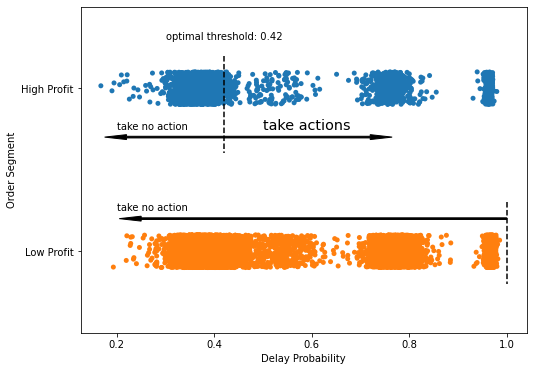

In [364]:
prob_high_profit_df = pd.DataFrame(data=prob_delay_high_profit, columns=['Delay Probability'])
prob_high_profit_df['Order Segment'] = 'High Profit'

prob_low_profit_df = pd.DataFrame(data=prob_delay_low_profit, columns=['Delay Probability'])
prob_low_profit_df['Order Segment'] = 'Low Profit'

prob_df = pd.concat([prob_high_profit_df, prob_low_profit_df], ignore_index=True, axis=0)
prob_df['Risk'] = pd.concat([Y_train_high_profit, Y_train_low_profit], axis=0)


fig, ax = plt.subplots(figsize=(8,6))
ax.vlines(optimal_r_high_profit, -0.2, 0.4, colors='black', linestyles='dashed', zorder=10)
ax.text(0.3, -0.3, 'optimal threshold: {}'.format(optimal_r_high_profit))
ax.text(0.5, 0.25, 'take actions', fontsize='x-large')
ax.arrow(0.42, 0.3, 0.3, 0, width=0.01, color='black')
ax.text(0.2, 0.25, 'take no action')
ax.arrow(0.42, 0.3, -0.2, 0, width=0.01, color='black')

ax.vlines(optimal_r_low_profit, 0.7, 1.2, colors='black', linestyles='dashed', zorder=10)
ax.arrow(1, 0.8, -0.75, 0, width=0.01, color='black')
ax.text(0.2, 0.75, 'take no action')


ax = sns.stripplot(y="Order Segment", x="Delay Probability", data=prob_df, jitter=0.1)


### Experiment with Different c and s
conclusions:
- High cost and low success probability will increase the optimal threshold and reduce the benefit.
- In reality, it is very important to control the cost and success probability of the actions. We can decide whether to take actions or not according to the cost and success probability.

In [494]:
#l_train, train_prob_delay
#l_train_high_profit, prob_delay_high_profit
#l_train_low_profit, prob_delay_low_profit
l_train = 0.45 * X_train['Benefit per order'].clip(lower=0) #for orders with negative profit, set l=0
X_train_sd = sc.fit_transform(X_train)
prob_delay_train = classifier.predict_proba(X_train_sd)[:,1]

l_train_high_profit = 0.45 * X_train_high_profit['Benefit per order']
X_train_high_profit_sd = sc.transform(X_train_high_profit)
prob_delay_train_high_profit = classifier.predict_proba(X_train_high_profit_sd)[:,1]

l_train_low_profit = 0.45 * X_train_low_profit['Benefit per order'].clip(lower=0)
X_train_low_profit_sd = sc.transform(X_train_low_profit)
prob_delay_train_low_profit = classifier.predict_proba(X_train_low_profit_sd)[:,1]

#l_test, test_prob_delay
#l_test_high_profit, prob_delay_test_high_profit
#l_test_low_profit, prob_delay_test_low_profit

l_test = 0.45 * X_test['Benefit per order'].clip(lower=0) #for orders with negative profit, set l=0
X_test_sd = sc.fit_transform(X_test)
prob_delay_test = classifier.predict_proba(X_test_sd)[:,1]

l_test_high_profit = 0.45 * X_test_high_profit['Benefit per order']
X_test_high_profit_sd = sc.transform(X_test_high_profit)
prob_delay_test_high_profit = classifier.predict_proba(X_test_high_profit_sd)[:,1]

l_test_low_profit = 0.45 * X_test_low_profit['Benefit per order'].clip(lower=0)
X_test_low_profit_sd = sc.transform(X_test_low_profit)
prob_delay_test_low_profit = classifier.predict_proba(X_test_low_profit_sd)[:,1]

In [495]:
cs = [1, 10, 20, 30]
ss = [0.7, 0.8, 0.9, 0.99]
results = {}
results_high_profit = dict()
results_low_profit = dict()

#whole data
for c in cs:
    for s in ss:
        current_cost_train, action_cost_train = calculate_costs(c, s, prob_delay_train, Y_train, l_train)
        benefit_train = current_cost_train - action_cost_train
        optimal_r = r_range[np.argmax(benefit_train)]
        
        potential_val_test = (np.where(Y_test, 1, 0) * (-c) + s * l_test.values * np.where(Y_test, 1, 0) ).sum()        
        current_cost_test, action_cost_test = calculate_costs_test(optimal_r, prob_delay_test, Y_test, l_test)
        benefit_test = current_cost_test - action_cost_test_high_profit
        
        reduces_test = round(benefit_test_high_profit / current_cost_test_high_profit, 2)
        captures_test = round(benefit_test / potential_val_test, 2)
        avg_benefit_per_order = round(benefit_test / len(Y_test), 2)
        
        results[(c, s)] = (optimal_r, benefit_test, action_cost_test, reduces_test, potential_val_test, captures_test, avg_benefit_per_order)

In [496]:
#high profit segment
for c in cs:
    for s in ss:
        current_cost_train_high_profit, action_cost_train_high_profit = calculate_costs(c, s, prob_delay_train_high_profit, Y_train_high_profit, l_train_high_profit)
        benefit_train_high_profit = current_cost_train_high_profit - action_cost_train_high_profit
        optimal_r_high_profit = r_range[np.argmax(benefit_train_high_profit)]
        
        potential_val_test_high_profit = (np.where(Y_test_high_profit, 1, 0) * (-c) + s * l_test_high_profit.values * np.where(Y_test_high_profit, 1, 0) ).sum()        
        current_cost_test_high_profit, action_cost_test_high_profit = calculate_costs_test(optimal_r_high_profit, prob_delay_test_high_profit, Y_test_high_profit, l_test_high_profit)
        benefit_test_high_profit = current_cost_test_high_profit - action_cost_test_high_profit
        
        reduces_test_high_profit = round(benefit_test_high_profit / current_cost_test_high_profit, 2)
        captures_test_high_profit = round(benefit_test_high_profit / potential_val_test_high_profit, 2)
        avg_benefit_per_order_high_profit= round(benefit_test_high_profit / len(Y_test_high_profit), 2)
        
        results_high_profit[(c, s)] = (optimal_r_high_profit, action_cost_test_high_profit, current_cost_test_high_profit, reduces_test_high_profit, potential_val_test_high_profit, captures_test_high_profit, avg_benefit_per_order_high_profit)

In [497]:
#low profit segment
for c in cs:
    for s in ss:
        current_cost_train_low_profit, action_cost_train_low_profit = calculate_costs(c, s, prob_delay_train_low_profit, Y_train_low_profit, l_train_low_profit)
        benefit_train_low_profit = current_cost_train_low_profit - action_cost_train_low_profit
        optimal_r_low_profit = r_range[np.argmax(benefit_train_low_profit)]
        
        potential_val_test_low_profit = (np.where(Y_test_low_profit, 1, 0) * (-c) + s * l_test_low_profit.values * np.where(Y_test_low_profit, 1, 0) ).sum()        
        current_cost_test_low_profit, action_cost_test_low_profit = calculate_costs_test(optimal_r_low_profit, prob_delay_test_low_profit, Y_test_low_profit, l_test_low_profit)
        benefit_test_low_profit = current_cost_test_low_profit - action_cost_test_low_profit
        
        reduces_test_low_profit = round(benefit_test_low_profit / current_cost_test_low_profit, 2)
        captures_test_low_profit = round(benefit_test_low_profit / potential_val_test_low_profit, 2)
        avg_benefit_per_order_low_profit= round(benefit_test_low_profit / len(Y_test_low_profit), 2)
        
        results_low_profit[(c, s)] = (optimal_r_low_profit, action_cost_test_low_profit, current_cost_test_low_profit, reduces_test_low_profit, potential_val_test_low_profit, captures_test_low_profit, avg_benefit_per_order_low_profit)


In [501]:
#whole data
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Optimal r', 'Action Cost', 'Original Cost', 'Cost Reduction', 'Perfect Reduction', 'Perfect Captures', 'Average Benefit Per Order'])
results_df.index.name = '(c, s)'
results_df

,Optimal r,Action Cost,Original Cost,Cost Reduction,Perfect Reduction,Perfect Captures,Average Benefit Per Order
"(c, s)",,,,,,,
"(1, 0.7)",0.00,19355.931935,14014.752829,0.19,23311.756602,0.83,5.91
"(1, 0.8)",0.00,19355.931935,10435.501886,0.19,26891.007545,0.72,5.91
"(1, 0.9)",0.00,19355.931935,6856.250943,0.19,30470.258488,0.64,5.91
"(1, 0.99)",0.00,19355.931935,3634.925094,0.19,33691.584337,0.57,5.91
"(10, 0.7)",0.68,19355.931935,34070.328400,0.19,7624.756602,2.54,5.91
"(10, 0.8)",0.66,19355.931935,32218.900257,0.19,11204.007545,1.73,5.91
"(10, 0.9)",0.66,19355.931935,30488.449110,0.19,14783.258488,1.31,5.91
"(10, 0.99)",0.66,19355.931935,28931.043078,0.19,18004.584337,1.08,5.91
"(20, 0.7)",1.00,19355.931935,35792.509431,0.19,-9805.243398,-1.97,5.91


In [502]:
#high profit segment
results_high_profit_df = pd.DataFrame.from_dict(results_high_profit, orient='index', columns=['Optimal r', 'Action Cost', 'Original Cost', 'Cost Reduction', 'Perfect Reduction', 'Perfect Captures', 'Average Benefit Per Order'])
results_high_profit_df.index.name = '(c, s)'
results_high_profit_df

,Optimal r,Action Cost,Original Cost,Cost Reduction,Perfect Reduction,Perfect Captures,Average Benefit Per Order
"(c, s)",,,,,,,
"(1, 0.7)",0.00,6757.606129,20342.020431,0.67,13867.414301,0.98,20.74
"(1, 0.8)",0.00,4723.404086,20342.020431,0.77,15901.616344,0.98,23.85
"(1, 0.9)",0.00,2689.202043,20342.020431,0.87,17935.818387,0.98,26.95
"(1, 0.99)",0.00,858.420204,20342.020431,0.96,19766.600226,0.99,29.75
"(10, 0.7)",0.00,12652.606129,20342.020431,0.38,10519.414301,0.73,11.74
"(10, 0.8)",0.00,10618.404086,20342.020431,0.48,12553.616344,0.77,14.85
"(10, 0.9)",0.00,8584.202043,20342.020431,0.58,14587.818387,0.81,17.95
"(10, 0.99)",0.00,6753.420204,20342.020431,0.67,16418.600226,0.83,20.75
"(20, 0.7)",0.62,17335.747649,20342.020431,0.15,6799.414301,0.44,4.59


In [503]:
#low profit segment
results_low_profit_df = pd.DataFrame.from_dict(results_low_profit, orient='index', columns=['Optimal r', 'Action Cost', 'Original Cost', 'Cost Reduction', 'Perfect Reduction', 'Perfect Captures', 'Average Benefit Per Order'])
results_low_profit_df.index.name = '(c, s)'
results_low_profit_df

,Optimal r,Action Cost,Original Cost,Cost Reduction,Perfect Reduction,Perfect Captures,Average Benefit Per Order
"(c, s)",,,,,,,
"(1, 0.7)",0.22,7245.601850,15415.3395,0.53,9420.737650,0.87,3.12
"(1, 0.8)",0.22,5704.067900,15415.3395,0.63,10962.271600,0.89,3.71
"(1, 0.9)",0.22,4162.533950,15415.3395,0.73,12503.805550,0.90,4.29
"(1, 0.99)",0.22,2775.153395,15415.3395,0.82,13891.186105,0.91,4.82
"(10, 0.7)",1.00,15415.339500,15415.3395,0.00,-2909.262350,-0.00,0.00
"(10, 0.8)",1.00,15415.339500,15415.3395,0.00,-1367.728400,-0.00,0.00
"(10, 0.9)",1.00,15415.339500,15415.3395,0.00,173.805550,0.00,0.00
"(10, 0.99)",0.90,15446.261608,15415.3395,-0.00,1561.186105,-0.02,-0.01
"(20, 0.7)",1.00,15415.339500,15415.3395,0.00,-16609.262350,-0.00,0.00


### Optimize Shipping Mode Available to Customers
Decide whether to offer customer the "first class" shipping option

**DOES NOT WORK** maximum benefit from changing first class to same day is $0.23
Benefit will be even less after considering the cost of customer dissatisfaction from less shipping options

In [88]:
# dataset["Shipping Mode"].unique()

In [89]:
"""
df_late_pred = dataset

feature_list = ['Days for shipment (scheduled)', 'Sales', 'Benefit per order', 'Category Id', 'Order Region', 'Order Item Discount Rate', 'Product Price', 'Order Item Quantity', 'Shipping Mode', 'Customer Segment']

X = pd.get_dummies(df_late_pred[col_list], drop_first=True)
Y = df_late_pred['Late_delivery_risk']==1
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)
# "first class" shipping orders
test_sm_more_delays = X_test[(X_test['Shipping Mode_Same Day'] == 0) & (X_test['Shipping Mode_Second Class'] == 0) & (X_test['Shipping Mode_Standard Class'] == 0)]
"""

'\ndf_late_pred = dataset\n\nfeature_list = [\'Days for shipment (scheduled)\', \'Sales\', \'Benefit per order\', \'Category Id\', \'Order Region\', \'Order Item Discount Rate\', \'Product Price\', \'Order Item Quantity\', \'Shipping Mode\', \'Customer Segment\']\n\nX = pd.get_dummies(df_late_pred[col_list], drop_first=True)\nY = df_late_pred[\'Late_delivery_risk\']==1\nX_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)\n# "first class" shipping orders\ntest_sm_more_delays = X_test[(X_test[\'Shipping Mode_Same Day\'] == 0) & (X_test[\'Shipping Mode_Second Class\'] == 0) & (X_test[\'Shipping Mode_Standard Class\'] == 0)]\n'

Suppose each late delivery has a loss (l), and customer dissatisfaction from less shipping mode option incurs a cost (d)

We can make some assumptions on the values of l and d:
- l: The value can depend on customer retention
    - according to https://clutch.co/logistics/resources/how-two-day-delivery-impacts-small-businesses, 45% of the customers say they are unlikely to continue ordering from a company if it delivers a package late
    - l = 0.45 * Benefit per order
- d: The staff using the model will specify this cost

For each order, if the customer chooses "first class", the probability of late delivery is $p_1$; if not, the probability of late delivery is $p_2$.

If $(p_1 - p_2) * l > d$, then we don't offer the first class option;
    
Otherwise, first class shipping is available.
    
We can plot `d - % of customers who can't use first class`

In [68]:
"""
prob_1 = classifier.predict_proba(test_sm_more_delays)
test_sm_more_delays_st = test_sm_more_delays.copy()
test_sm_more_delays_st.loc[:,'Shipping Mode_Same Day'] = 1 # change shipping mode from first class to standard class
prob_2 = classifier.predict_proba(test_sm_more_delays_st)

delta_prob = prob_1[:,1] - prob_2[:,1]
"""

"\nprob_1 = classifier.predict_proba(test_sm_more_delays)\ntest_sm_more_delays_st = test_sm_more_delays.copy()\ntest_sm_more_delays_st.loc[:,'Shipping Mode_Same Day'] = 1 # change shipping mode from first class to standard class\nprob_2 = classifier.predict_proba(test_sm_more_delays_st)\n\ndelta_prob = prob_1[:,1] - prob_2[:,1]\n"

In [69]:
"""
delay_loss = 0.45 * test_sm_more_delays['Benefit per order']
delta_loss = delta_prob * delay_loss
"""

"\ndelay_loss = 0.45 * test_sm_more_delays['Benefit per order']\ndelta_loss = delta_prob * delay_loss\n"

In [70]:
# delta_loss

In [71]:
# max(delta_loss)

# Thank you